In [ ]:
## load libs 

In [ ]:
!pip install torch==1.4.0

     |████████████████████████████████| 753.4MB 21kB/s 
ERROR: torchvision 0.7.0+cu101 has requirement torch==1.6.0, but you'll have torch 1.4.0 which is incompatible.
  Found existing installation: torch 1.6.0+cu101
    Uninstalling torch-1.6.0+cu101:
      Successfully uninstalled torch-1.6.0+cu101


In [ ]:
import pandas as pd
import torch
from torch import nn, optim
import torch.nn.functional as F
import matplotlib.pyplot as plt
import seaborn as sns
torch.__version__

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


'1.4.0'

In [ ]:
torch.manual_seed(123)

In [ ]:
base = pd.read_csv('games.csv')

In [ ]:
base.head()

,Name,Platform,Year_of_Release,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales,Critic_Score,Critic_Count,User_Score,User_Count,Developer,Rating
0,Wii Sports,Wii,2006.0,Sports,Nintendo,41.36,28.96,3.77,8.45,82.53,76.0,51.0,8,322.0,Nintendo,E
1,Super Mario Bros.,NES,1985.0,Platform,Nintendo,29.08,3.58,6.81,0.77,40.24,NaN,NaN,NaN,NaN,NaN,NaN
2,Mario Kart Wii,Wii,2008.0,Racing,Nintendo,15.68,12.76,3.79,3.29,35.52,82.0,73.0,8.3,709.0,Nintendo,E
3,Wii Sports Resort,Wii,2009.0,Sports,Nintendo,15.61,10.93,3.28,2.95,32.77,80.0,73.0,8,192.0,Nintendo,E
4,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,Nintendo,11.27,8.89,10.22,1.00,31.37,NaN,NaN,NaN,NaN,NaN,NaN


In [ ]:
base = base.drop('Other_Sales', axis = 1)
base = base.drop('Global_Sales', axis = 1)
base = base.drop('Developer', axis = 1)

In [ ]:
base.shape

(16719, 13)

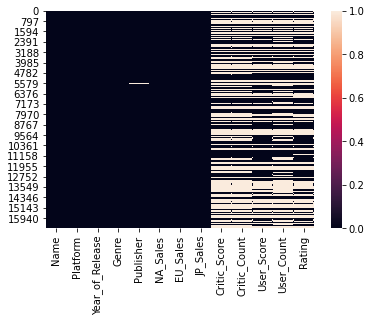

In [ ]:
sns.heatmap(base.isnull());

In [ ]:
base = base.dropna(axis = 0)

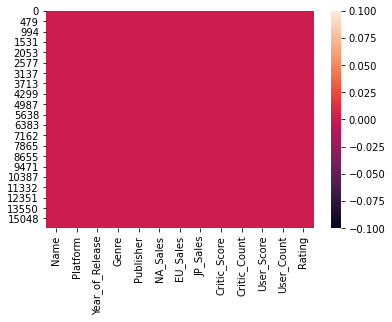

In [ ]:
sns.heatmap(base.isnull())

In [ ]:
base.shape

(6825, 13)

In [ ]:
base.loc[base['NA_Sales'] > 1]

,Name,Platform,Year_of_Release,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Critic_Score,Critic_Count,User_Score,User_Count,Rating
0,Wii Sports,Wii,2006.0,Sports,Nintendo,41.36,28.96,3.77,76.0,51.0,8,322.0,E
2,Mario Kart Wii,Wii,2008.0,Racing,Nintendo,15.68,12.76,3.79,82.0,73.0,8.3,709.0,E
3,Wii Sports Resort,Wii,2009.0,Sports,Nintendo,15.61,10.93,3.28,80.0,73.0,8,192.0,E
6,New Super Mario Bros.,DS,2006.0,Platform,Nintendo,11.28,9.14,6.50,89.0,65.0,8.5,431.0,E
7,Wii Play,Wii,2006.0,Misc,Nintendo,13.96,9.18,2.93,58.0,41.0,6.6,129.0,E
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1872,NCAA Football 14,X360,2013.0,Sports,Electronic Arts,1.01,0.00,0.00,77.0,18.0,5.8,74.0,E
1877,NFL 2K1,DC,2000.0,Sports,Sega,1.02,0.05,0.00,97.0,22.0,6,47.0,E
1881,Madden NFL 2004,XB,2003.0,Sports,Electronic Arts,1.02,0.02,0.00,92.0,27.0,8.3,48.0,E
1889,NCAA Football 13,X360,2012.0,Action,Electronic Arts,1.02,0.00,0.00,76.0,20.0,5.5,65.0,E


In [ ]:
base = base.loc[base['NA_Sales'] > 1 ] 

In [ ]:
base.shape

(584, 13)

In [ ]:
base.head()

,Name,Platform,Year_of_Release,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Critic_Score,Critic_Count,User_Score,User_Count,Rating
0,Wii Sports,Wii,2006.0,Sports,Nintendo,41.36,28.96,3.77,76.0,51.0,8,322.0,E
2,Mario Kart Wii,Wii,2008.0,Racing,Nintendo,15.68,12.76,3.79,82.0,73.0,8.3,709.0,E
3,Wii Sports Resort,Wii,2009.0,Sports,Nintendo,15.61,10.93,3.28,80.0,73.0,8,192.0,E
6,New Super Mario Bros.,DS,2006.0,Platform,Nintendo,11.28,9.14,6.50,89.0,65.0,8.5,431.0,E
7,Wii Play,Wii,2006.0,Misc,Nintendo,13.96,9.18,2.93,58.0,41.0,6.6,129.0,E


In [ ]:
base.loc[base['EU_Sales'] > 1]


,Name,Platform,Year_of_Release,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Critic_Score,Critic_Count,User_Score,User_Count,Rating
0,Wii Sports,Wii,2006.0,Sports,Nintendo,41.36,28.96,3.77,76.0,51.0,8,322.0,E
2,Mario Kart Wii,Wii,2008.0,Racing,Nintendo,15.68,12.76,3.79,82.0,73.0,8.3,709.0,E
3,Wii Sports Resort,Wii,2009.0,Sports,Nintendo,15.61,10.93,3.28,80.0,73.0,8,192.0,E
6,New Super Mario Bros.,DS,2006.0,Platform,Nintendo,11.28,9.14,6.50,89.0,65.0,8.5,431.0,E
7,Wii Play,Wii,2006.0,Misc,Nintendo,13.96,9.18,2.93,58.0,41.0,6.6,129.0,E
...,...,...,...,...,...,...,...,...,...,...,...,...,...
568,Medal of Honor,PS,1998.0,Shooter,Electronic Arts,1.44,1.09,0.00,92.0,17.0,8.6,80.0,T
573,Tom Clancy's Splinter Cell,PS2,2003.0,Action,Ubisoft,1.15,1.11,0.00,89.0,24.0,7.7,102.0,T
591,Mario Strikers Charged,Wii,2007.0,Sports,Nintendo,1.05,1.05,0.24,79.0,47.0,8,124.0,E10+
610,Crazy Taxi,PS2,2001.0,Racing,Acclaim Entertainment,1.13,1.12,0.06,80.0,15.0,7.9,46.0,T


In [ ]:
base = base.loc[base['EU_Sales'] > 1]

In [ ]:
base.shape

(258, 13)

In [ ]:
base['Name'].value_counts()

Grand Theft Auto V                 4
The Elder Scrolls V: Skyrim        3
Assassin's Creed IV: Black Flag    3
Call of Duty: Ghosts               3
Battlefield 4                      3
                                  ..
Super Smash Bros. Brawl            1
Mario Kart 8                       1
Super Mario Sunshine               1
Assassin's Creed: Unity            1
Resident Evil 2                    1
Name: Name, Length: 223, dtype: int64

In [ ]:
base = base.drop("Name", axis = 1)

In [ ]:
base.shape

(258, 12)

In [ ]:
previsores = base.iloc[:, [0,1,2,3,7,8,9,10,11]].values

In [ ]:
vendas = base.iloc[:,4:7].values

In [ ]:
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer

onehotencoder = ColumnTransformer(transformers=[('OneHot',OneHotEncoder(), [0,2,3,8])], remainder = 'passthrough')

previsores =  onehotencoder.fit_transform(previsores).toarray()

In [ ]:
previsores

array([[  0. ,   0. ,   0. , ...,  51. ,   8. , 322. ],
       [  0. ,   0. ,   0. , ...,  73. ,   8.3, 709. ],
       [  0. ,   0. ,   0. , ...,  73. ,   8. , 192. ],
       ...,
       [  0. ,   0. ,   0. , ...,  47. ,   8. , 124. ],
       [  0. ,   0. ,   0. , ...,  15. ,   7.9,  46. ],
       [  0. ,   0. ,   0. , ...,  26. ,   8.4,  42. ]])

In [ ]:
previsores.shape

(258, 61)

# Construção Model

In [ ]:
import torch.nn as nn

In [ ]:
class regressor_torch(nn.Module):
  def __init__(self):
    super().__init__()
    self.dense0 = nn.Linear(61,32)
    self.dense1 = nn.Linear(32,32)
    self.activation0 = nn.Sigmoid()
    self.output = nn.Linear(32,3)

  def forward(self, X):
    X = self.dense0(X) 
    X = self.activation0(X)
    X = self.dense1(X)
    X = self.activation0(X)
    #X = self.dropout(X)
    X = self.output(X)
    return X 

In [ ]:
regressor = regressor_torch()

In [ ]:
criterion = nn.MSELoss()

optimizer = optim.Adam(regressor.parameters())

In [ ]:
entrada = 61
saida = 3 
print((entrada+saida) / 2 )

32.0


In [ ]:
previsores = torch.tensor(previsores, dtype=torch.float)
vendas = torch.tensor(vendas, dtype=torch.float)

In [ ]:
type(previsores)

torch.Tensor

In [ ]:
dataset = torch.utils.data.TensorDataset(previsores, vendas)

train_loader = torch.utils.data.DataLoader(dataset, batch_size=10, shuffle=True)


# Treino Model

In [ ]:
device = 'cuda' if torch.cuda.is_available() else 'cpu'
print(device)

cuda


In [ ]:
regressor.to(device)

regressor_torch(
  (dense0): Linear(in_features=61, out_features=32, bias=True)
  (dense1): Linear(in_features=32, out_features=32, bias=True)
  (activation0): Sigmoid()
  (output): Linear(in_features=32, out_features=3, bias=True)
)

In [ ]:
for epoch in range(2000):
    
    running_loss = 0.
    running_mse_0 = 0.
    running_mse_1 = 0.
    running_mse_2 = 0.
    
    for i, data in enumerate(train_loader):
        inputs, labels = data

        inputs, labels = inputs.to(device), labels.to(device)

        optimizer.zero_grad() # zerar o gradiente

        outputs = regressor.forward(inputs) ## batch de 10 registros 

        mse_0 = F.mse_loss(outputs[:, 0], labels[:, 0]).item()
        mse_1 = F.mse_loss(outputs[:, 1], labels[:, 1]).item()
        mse_2 = F.mse_loss(outputs[:, 2], labels[:, 2]).item()

        running_mse_0 += mse_0 * len(inputs)
        running_mse_1 += mse_1 * len(inputs)
        running_mse_2 += mse_2 * len(inputs)
        # calculo do erro geral 
        loss = criterion(outputs,labels)
        loss.backward()

        optimizer.step() 

        loss = loss.item()

        running_loss += loss * len(inputs)


        print('\rÉpoca {:4d} - Loop {:3d} de {:3d}: erro_0 {:6.4f} | erro_1 {:6.4f} | erro_2 {:6.4f} - custo {:6.4f}'.format(epoch + 1,
                      i + 1,
                      len(train_loader),
                      mse_0,
                      mse_1,
                      mse_2,
                      loss), end = '\r')

    print('ÉPOCA {:4d} finalizada: erro_0 {:6.4f} | erro_1 {:6.4f} | erro_2 {:6.4f} - custo {:6.4f}         '.format(epoch + 1, 
         running_mse_0/len(dataset), 
         running_mse_1/len(dataset), 
         running_mse_2/len(dataset), 
         running_loss/len(dataset)))

ÉPOCA    1 finalizada: erro_0 21.6566 | erro_1 13.6107 | erro_2 1.3421 - custo 12.2031         
ÉPOCA    2 finalizada: erro_0 18.1948 | erro_1 10.3837 | erro_2 1.2020 - custo 9.9268         
ÉPOCA    3 finalizada: erro_0 15.4507 | erro_1 8.2656 | erro_2 1.1725 - custo 8.2963         
ÉPOCA    4 finalizada: erro_0 13.6594 | erro_1 6.9918 | erro_2 1.1697 - custo 7.2736         
ÉPOCA    5 finalizada: erro_0 12.7062 | erro_1 6.3203 | erro_2 1.1762 - custo 6.7342         
ÉPOCA    6 finalizada: erro_0 12.2221 | erro_1 6.0073 | erro_2 1.1699 - custo 6.4664         
ÉPOCA    7 finalizada: erro_0 12.0695 | erro_1 5.8993 | erro_2 1.1717 - custo 6.3802         
ÉPOCA    8 finalizada: erro_0 11.9885 | erro_1 5.8604 | erro_2 1.1712 - custo 6.3400         
ÉPOCA    9 finalizada: erro_0 11.9515 | erro_1 5.8503 | erro_2 1.1769 - custo 6.3263         
ÉPOCA   10 finalizada: erro_0 11.9366 | erro_1 5.8428 | erro_2 1.1733 - custo 6.3176         
ÉPOCA   11 finalizada: erro_0 11.9433 | erro_1 5.8477 | e

# Avaliação do  Modelo

In [ ]:
regressor.eval()

regressor_torch(
  (dense0): Linear(in_features=61, out_features=32, bias=True)
  (dense1): Linear(in_features=32, out_features=32, bias=True)
  (activation0): Sigmoid()
  (output): Linear(in_features=32, out_features=3, bias=True)
)

In [ ]:
previsores = previsores.to(device)

In [ ]:
result = regressor.forward(previsores)

In [ ]:
result

tensor([[3.2093, 2.2919, 0.6087],
        [3.2093, 2.2919, 0.6087],
        [3.2093, 2.2919, 0.6087],
        [3.2093, 2.2919, 0.6087],
        [3.2093, 2.2919, 0.6087],
        [3.2093, 2.2919, 0.6087],
        [3.2093, 2.2919, 0.6087],
        [3.2093, 2.2919, 0.6087],
        [3.2093, 2.2919, 0.6087],
        [3.2093, 2.2919, 0.6087],
        [3.2093, 2.2919, 0.6087],
        [3.2093, 2.2919, 0.6087],
        [3.2093, 2.2919, 0.6087],
        [3.2093, 2.2919, 0.6087],
        [3.2093, 2.2919, 0.6087],
        [3.2093, 2.2919, 0.6087],
        [2.9230, 2.5778, 0.1202],
        [3.2093, 2.2919, 0.6087],
        [3.2093, 2.2919, 0.6087],
        [3.2093, 2.2919, 0.6087],
        [3.2093, 2.2919, 0.6087],
        [3.2683, 2.5407, 0.3670],
        [3.2093, 2.2919, 0.6087],
        [3.2093, 2.2919, 0.6087],
        [3.2093, 2.2919, 0.6087],
        [3.2093, 2.2919, 0.6087],
        [3.2093, 2.2919, 0.6087],
        [3.2093, 2.2919, 0.6087],
        [3.2093, 2.2919, 0.6087],
        [3.209

In [ ]:
result = result.cpu().detach().numpy()

In [ ]:
result

array([[3.2093155 , 2.291899  , 0.6086966 ],
       [3.2093155 , 2.291899  , 0.6086966 ],
       [3.2093155 , 2.291899  , 0.6086966 ],
       [3.2093155 , 2.291899  , 0.6086966 ],
       [3.2093155 , 2.291899  , 0.6086966 ],
       [3.2093155 , 2.291899  , 0.6086966 ],
       [3.2093155 , 2.291899  , 0.6086966 ],
       [3.2093155 , 2.291899  , 0.6086966 ],
       [3.2093155 , 2.291899  , 0.6086966 ],
       [3.2093155 , 2.291899  , 0.6086966 ],
       [3.2093155 , 2.291899  , 0.6086966 ],
       [3.2093155 , 2.291899  , 0.6086966 ],
       [3.2093155 , 2.291899  , 0.6086966 ],
       [3.2093155 , 2.291899  , 0.6086966 ],
       [3.2093155 , 2.291899  , 0.6086966 ],
       [3.2093155 , 2.291899  , 0.6086966 ],
       [2.922991  , 2.577776  , 0.12020638],
       [3.2093155 , 2.291899  , 0.6086966 ],
       [3.2093155 , 2.291899  , 0.6086966 ],
       [3.2093155 , 2.291899  , 0.6086966 ],
       [3.2093155 , 2.291899  , 0.6086966 ],
       [3.268337  , 2.5407403 , 0.36699396],
       [3.

In [ ]:
result.mean(axis=0)

array([3.2035642, 2.3024027, 0.5935898], dtype=float32)

In [ ]:
vendas.mean(axis=0)

tensor([3.2838, 2.3505, 0.5862])

In [ ]:
import matplotlib.pyplot as plt


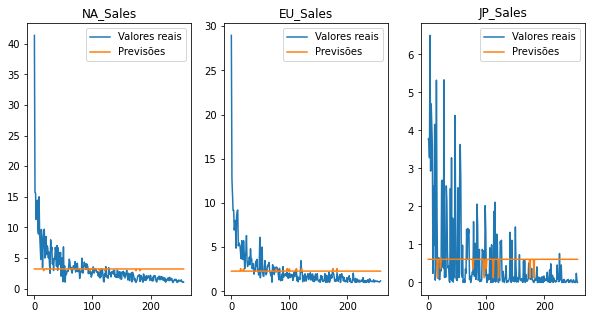

In [ ]:
fig, ax = plt.subplots(1, 3, figsize=(10,5))
for i in range(3):
  ax[i].plot(vendas[:, i])
  ax[i].plot(result[:, i])
  ax[i].legend(['Valores reais', 'Previsões'])
  ax[i].set_title(base.columns[4 + i])